In [138]:
# !pip install seaborn

In [144]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
%matplotlib inline
from geopandas import GeoSeries
from shapely.ops import cascaded_union
import leafmap
from shapely.geometry import MultiPoint
from shapely.geometry import Polygon

## マッチング
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import Image, display
def imshow(img):
    """ndarray 配列をインラインで Notebook 上に表示する。
    """
    ret, encoded = cv2.imencode(".jpg", img)
    display(Image(encoded))
def draw_contours(img, contours):
    """輪郭を可視化する。
    """
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.imshow(img)
    ax.set_axis_off()
    for i, cnt in enumerate(contours):
        cnt = np.squeeze(cnt, axis=1)  # (NumPoints, 1, 2) -> (NumPoints, 2)
        # 輪郭の点同士を結ぶ線を描画する。
        ax.add_patch(plt.Polygon(cnt, color="b", fill=None, lw=2))
        # 輪郭の点を描画する。
        ax.plot(cnt[:, 0], cnt[:, 1], "ro", mew=0, ms=4)
        # 輪郭の番号を描画する。
        ax.text(cnt[0][0], cnt[0][1], i, color="orange", fontsize=20)
    plt.show()

## 木場

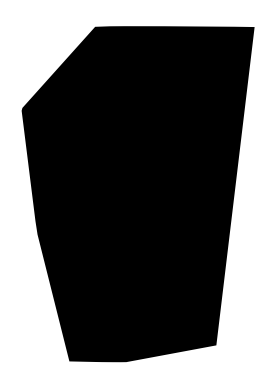

In [151]:
# 任意座標系_江東区木場
rootpath = "/work/work/chiban/data/"
filename = rootpath + "13108-0106-40.geojson"
file = open(filename)
gdf = gpd.read_file(file)
gdf["all"] = 1
allgdf = gdf.dissolve(by="all", aggfunc="sum")
allgdf["convex_hull"] = allgdf.convex_hull
# matplotlibで可視化
fig , ax = plt.subplots(1, 1)
# 罫線を削除
ax.set_axis_off()
allgdf["convex_hull"].plot(ax=ax, aspect=1, color="black")
# matplotlib to .jpg
plt.savefig("/work/work/chiban/image_match/image/木場_任意.jpg")

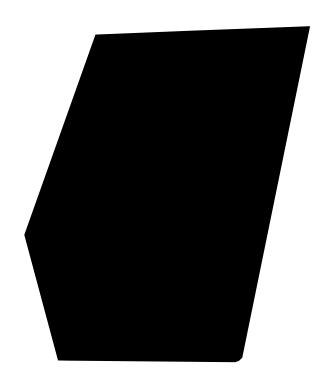

In [152]:
# shapefile
gdf = gpd.read_file("/work/work/chiban/data/koutou/r2ka13108.shp")  
gdf = gdf[gdf["S_NAME"].isin(["木場一丁目", "木場二丁目", "木場三丁目", "木場四丁目", "木場五丁目", "木場六丁目"])]
gdf["all"] = 1
allgdf = gdf.dissolve(by="all", aggfunc="sum")
allgdf["convex_hull"] = allgdf.convex_hull
# ax = allgdf["convex_hull"].plot(alpha=.5)  # saving the first plot as an axis and setting alpha (transparency) to 0.5
# gdf.plot(ax=ax, color="white", linewidth=.5)  # passing the first plot and setting linewitdth to 0.5

# matplotlibで可視化
fig , ax = plt.subplots(1, 1)
# 罫線を削除
ax.set_axis_off()
allgdf["convex_hull"].plot(ax=ax, aspect=1, color="black")

# matplotlib to .jpg
plt.savefig("/work/work/chiban/image_match/image/木場_絶対.jpg")

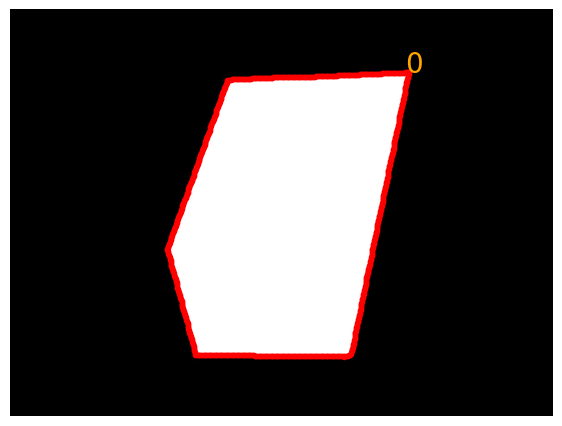

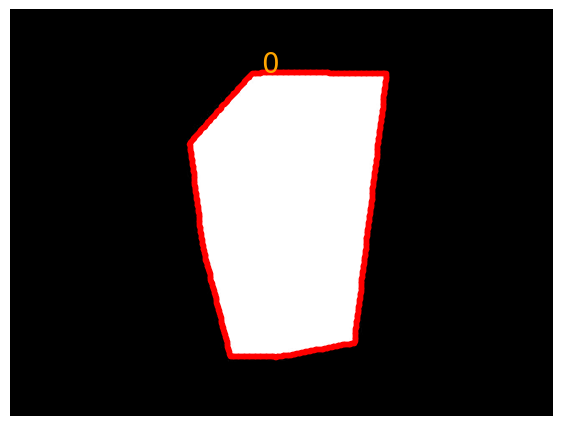

[[0.08546821]]


In [153]:
# 画像を読み込む。
img_z = cv2.imread("/work/work/chiban/image_match/image/木場_絶対.jpg")
# 白黒反転
img_z = 255 - img_z
# グレースケールに変換する。
gray_z = cv2.cvtColor(img_z, cv2.COLOR_BGR2GRAY)
# # 2値化する。
binary_z = cv2.threshold(gray_z, 100, 255, cv2.THRESH_BINARY)[1]
# # # # 輪郭を抽出する。
contours_z, hierarchy_z = cv2.findContours(
    binary_z, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE
)
draw_contours(img_z, contours_z)

# 画像を読み込む。
img_n = cv2.imread("/work/work/chiban/image_match/image/木場_任意.jpg")
# 白黒反転
img_n = 255 - img_n
# グレースケールに変換する。
gray_n = cv2.cvtColor(img_n, cv2.COLOR_BGR2GRAY)
# # 2値化する。
binary_n = cv2.threshold(gray_n, 100, 255, cv2.THRESH_BINARY)[1]
# # # # 輪郭を抽出する。
contours_n, hierarchy_n = cv2.findContours(
    binary_n, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE
)
draw_contours(img_n, contours_n)


num_cnts = len(contours_n)
# 類似度を計算する。
matches = np.empty((num_cnts, num_cnts))
for i, j in np.ndindex(*matches.shape):
    matches[i, j] = cv2.matchShapes(contours_z[i], contours_n[i], cv2.CONTOURS_MATCH_I1, 0)
print(matches)

## 港区_西麻布1~4丁目

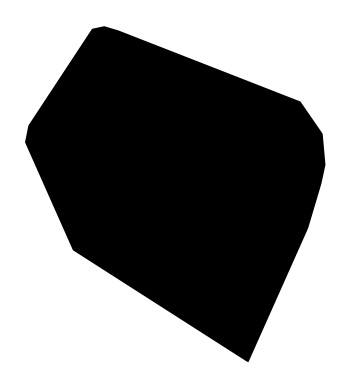

In [154]:
# 任意座標系_港区西麻布
rootpath = "/work/work/chiban/data/"
filename = rootpath + "13103-0104-19.geojson"
file = open(filename)
gdf = gpd.read_file(file)
gdf["all"] = 1
allgdf = gdf.dissolve(by="all", aggfunc="sum")
allgdf["convex_hull"] = allgdf.convex_hull
# matplotlibで可視化
fig , ax = plt.subplots(1, 1)
# 罫線を削除
ax.set_axis_off()
allgdf["convex_hull"].plot(ax=ax, aspect=1, color="black")
# matplotlib to .jpg
plt.savefig("/work/work/chiban/image_match/image/西麻布_任意.jpg")

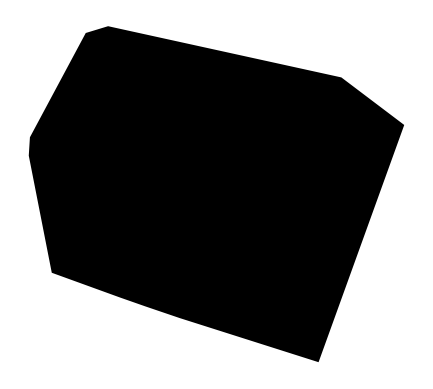

In [155]:
# shapefile
gdf = gpd.read_file("/work/work/chiban/data/minato/r2ka13103.shp")
gdf = gdf[gdf["S_NAME"].isin(["西麻布一丁目", "西麻布二丁目", "西麻布三丁目", "西麻布四丁目"])]
gdf["all"] = 1
allgdf = gdf.dissolve(by="all", aggfunc="sum")
allgdf["convex_hull"] = allgdf.convex_hull
# ax = allgdf["convex_hull"].plot(alpha=.5)  # saving the first plot as an axis and setting alpha (transparency) to 0.5
# gdf.plot(ax=ax, color="white", linewidth=.5)  # passing the first plot and setting linewitdth to 0.5

# matplotlibで可視化
fig , ax = plt.subplots(1, 1)
# 罫線を削除
ax.set_axis_off()
allgdf["convex_hull"].plot(ax=ax, aspect=1, color="black")

# matplotlib to .jpg
plt.savefig("/work/work/chiban/image_match/image/西麻布_絶対.jpg")

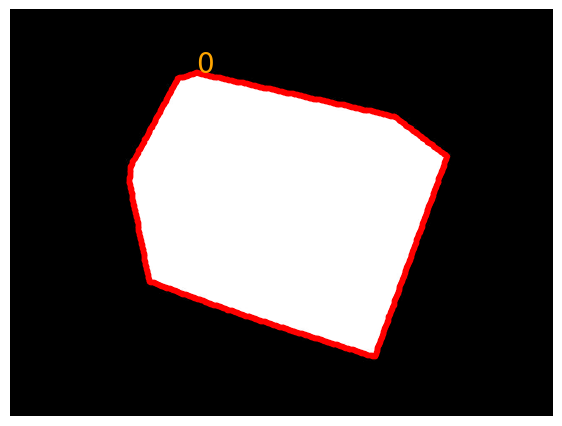

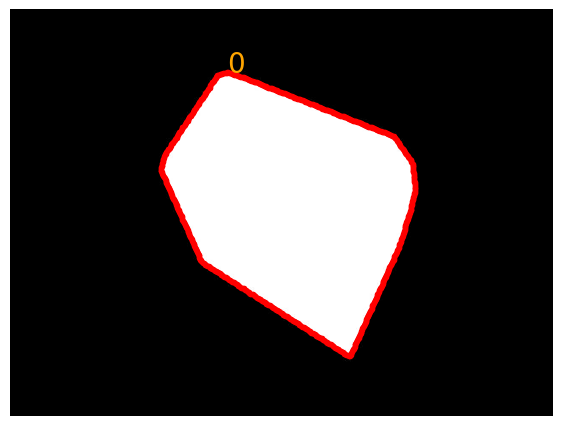

[[0.05346477]]


In [156]:
# 画像を読み込む。
img_z = cv2.imread("/work/work/chiban/image_match/image/西麻布_絶対.jpg")
# 白黒反転
img_z = 255 - img_z
# グレースケールに変換する。
gray_z = cv2.cvtColor(img_z, cv2.COLOR_BGR2GRAY)
# # 2値化する。
binary_z = cv2.threshold(gray_z, 100, 255, cv2.THRESH_BINARY)[1]
# # # # 輪郭を抽出する。
contours_z, hierarchy_z = cv2.findContours(
    binary_z, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE
)
draw_contours(img_z, contours_z)

# 画像を読み込む。
img_n = cv2.imread("/work/work/chiban/image_match/image/西麻布_任意.jpg")
# 白黒反転
img_n = 255 - img_n
# グレースケールに変換する。
gray_n = cv2.cvtColor(img_n, cv2.COLOR_BGR2GRAY)
# # 2値化する。
binary_n = cv2.threshold(gray_n, 100, 255, cv2.THRESH_BINARY)[1]
# # # # 輪郭を抽出する。
contours_n, hierarchy_n = cv2.findContours(
    binary_n, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE
)
draw_contours(img_n, contours_n)


num_cnts = len(contours_n)
# 類似度を計算する。
matches = np.empty((num_cnts, num_cnts))
for i, j in np.ndindex(*matches.shape):
    matches[i, j] = cv2.matchShapes(contours_z[i], contours_n[i], cv2.CONTOURS_MATCH_I1, 0)
print(matches)

## 中央区_日本橋

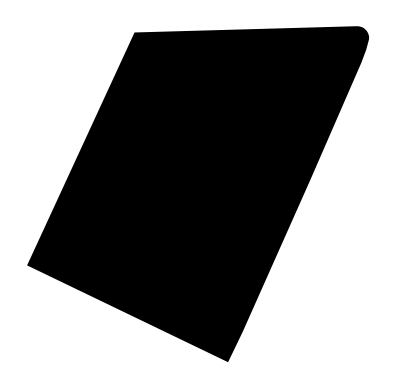

In [157]:
# 任意座標系_港区西麻布
rootpath = "/work/work/chiban/data/"
filename = rootpath + "13102-0100-19.geojson"
file = open(filename)
gdf = gpd.read_file(file)
gdf["all"] = 1
allgdf = gdf.dissolve(by="all", aggfunc="sum")
allgdf["convex_hull"] = allgdf.convex_hull
# matplotlibで可視化
fig , ax = plt.subplots(1, 1)
# 罫線を削除
ax.set_axis_off()
allgdf["convex_hull"].plot(ax=ax, aspect=1, color="black")
# matplotlib to .jpg
plt.savefig("/work/work/chiban/image_match/image/日本橋_任意.jpg")

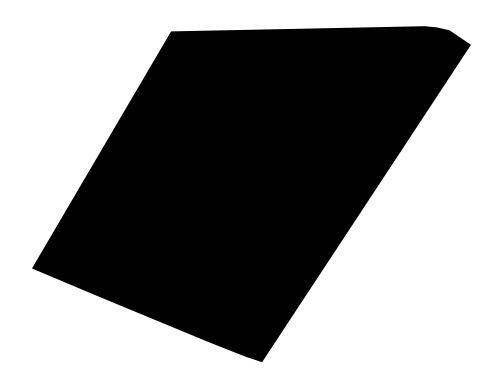

In [158]:
# shapefile
gdf = gpd.read_file("/work/work/chiban/data/tyuou/r2ka13102.shp")  
gdf = gdf[gdf["S_NAME"].isin(["日本橋一丁目", "日本橋二丁目", "日本橋三丁目"])]
gdf["all"] = 1
allgdf = gdf.dissolve(by="all", aggfunc="sum")
allgdf["convex_hull"] = allgdf.convex_hull
# ax = allgdf["convex_hull"].plot(alpha=.5)  # saving the first plot as an axis and setting alpha (transparency) to 0.5
# gdf.plot(ax=ax, color="white", linewidth=.5)  # passing the first plot and setting linewitdth to 0.5

# matplotlibで可視化
fig , ax = plt.subplots(1, 1)
# 罫線を削除
ax.set_axis_off()
allgdf["convex_hull"].plot(ax=ax, aspect=1, color="black")

# matplotlib to .jpg
plt.savefig("/work/work/chiban/image_match/image/日本橋_絶対.jpg")

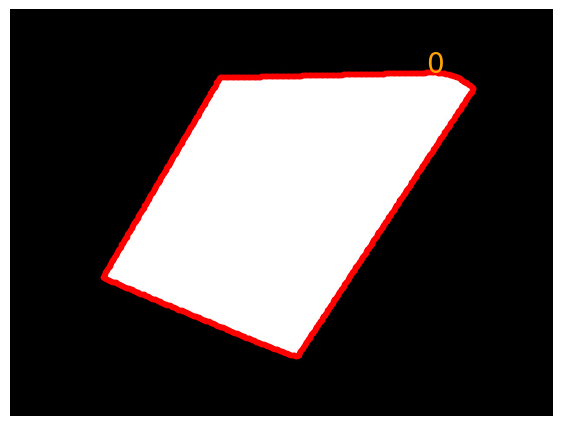

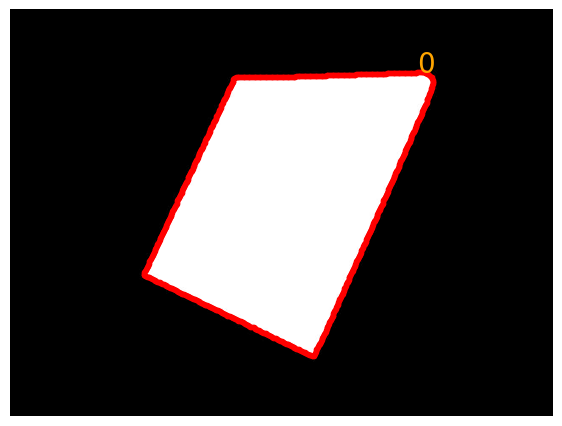

[[0.05826731]]


In [159]:
# 画像を読み込む。
img_z = cv2.imread("/work/work/chiban/image_match/image/日本橋_絶対.jpg")
# 白黒反転
img_z = 255 - img_z
# グレースケールに変換する。
gray_z = cv2.cvtColor(img_z, cv2.COLOR_BGR2GRAY)
# # 2値化する。
binary_z = cv2.threshold(gray_z, 100, 255, cv2.THRESH_BINARY)[1]
# # # # 輪郭を抽出する。
contours_z, hierarchy_z = cv2.findContours(
    binary_z, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE
)
draw_contours(img_z, contours_z)

# 画像を読み込む。
img_n = cv2.imread("/work/work/chiban/image_match/image/日本橋_任意.jpg")
# 白黒反転
img_n = 255 - img_n
# グレースケールに変換する。
gray_n = cv2.cvtColor(img_n, cv2.COLOR_BGR2GRAY)
# # 2値化する。
binary_n = cv2.threshold(gray_n, 100, 255, cv2.THRESH_BINARY)[1]
# # # # 輪郭を抽出する。
contours_n, hierarchy_n = cv2.findContours(
    binary_n, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE
)
draw_contours(img_n, contours_n)


num_cnts = len(contours_n)
# 類似度を計算する。
matches = np.empty((num_cnts, num_cnts))
for i, j in np.ndindex(*matches.shape):
    matches[i, j] = cv2.matchShapes(contours_z[i], contours_n[i], cv2.CONTOURS_MATCH_I1, 0)
print(matches)

## 渋谷区_代々木5丁目

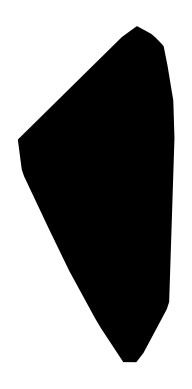

In [160]:
# 任意座標系_港区西麻布
rootpath = "/work/work/chiban/data/"
filename = rootpath + "13113-0110-19.geojson"
file = open(filename)
gdf = gpd.read_file(file)
gdf["all"] = 1
allgdf = gdf.dissolve(by="all", aggfunc="sum")
allgdf["convex_hull"] = allgdf.convex_hull
# matplotlibで可視化
fig , ax = plt.subplots(1, 1)
# 罫線を削除
ax.set_axis_off()
allgdf["convex_hull"].plot(ax=ax, aspect=1, color="black")
# matplotlib to .jpg
plt.savefig("/work/work/chiban/image_match/image/代々木5丁目_任意.jpg")

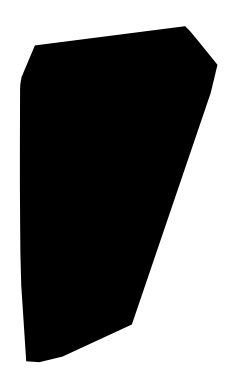

In [161]:
# shapefile
gdf = gpd.read_file("/work/work/chiban/data/sibuya/r2ka13113.shp")
gdf = gdf[gdf["S_NAME"].isin(["代々木五丁目"])]
gdf["all"] = 1
allgdf = gdf.dissolve(by="all", aggfunc="sum")
allgdf["convex_hull"] = allgdf.convex_hull
# ax = allgdf["convex_hull"].plot(alpha=.5)  # saving the first plot as an axis and setting alpha (transparency) to 0.5
# gdf.plot(ax=ax, color="white", linewidth=.5)  # passing the first plot and setting linewitdth to 0.5

# matplotlibで可視化
fig , ax = plt.subplots(1, 1)
# 罫線を削除
ax.set_axis_off()
allgdf["convex_hull"].plot(ax=ax, aspect=1, color="black")

# matplotlib to .jpg
plt.savefig("/work/work/chiban/image_match/image/代々木5丁目_絶対.jpg")

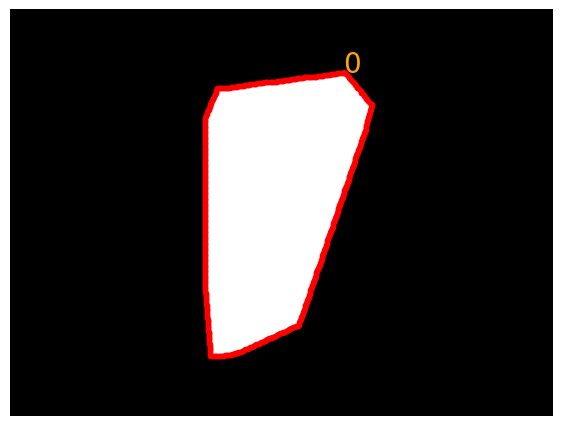

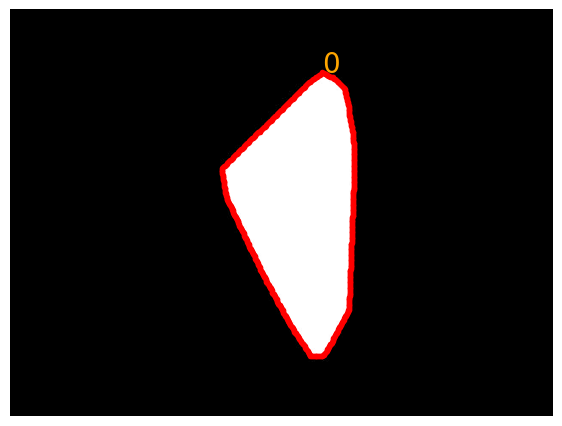

[[0.12657623]]


In [162]:
# 画像を読み込む。
img_z = cv2.imread("/work/work/chiban/image_match/image/代々木5丁目_絶対.jpg")
# 白黒反転
img_z = 255 - img_z
# グレースケールに変換する。
gray_z = cv2.cvtColor(img_z, cv2.COLOR_BGR2GRAY)
# # 2値化する。
binary_z = cv2.threshold(gray_z, 100, 255, cv2.THRESH_BINARY)[1]
# # # # 輪郭を抽出する。
contours_z, hierarchy_z = cv2.findContours(
    binary_z, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE
)
draw_contours(img_z, contours_z)

# 画像を読み込む。
img_n = cv2.imread("/work/work/chiban/image_match/image/代々木5丁目_任意.jpg")
# 白黒反転
img_n = 255 - img_n
# グレースケールに変換する。
gray_n = cv2.cvtColor(img_n, cv2.COLOR_BGR2GRAY)
# # 2値化する。
binary_n = cv2.threshold(gray_n, 100, 255, cv2.THRESH_BINARY)[1]
# # # # 輪郭を抽出する。
contours_n, hierarchy_n = cv2.findContours(
    binary_n, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE
)
draw_contours(img_n, contours_n)


num_cnts = len(contours_n)
# 類似度を計算する。
matches = np.empty((num_cnts, num_cnts))
for i, j in np.ndindex(*matches.shape):
    matches[i, j] = cv2.matchShapes(contours_z[i], contours_n[i], cv2.CONTOURS_MATCH_I1, 0)
print(matches)

## 新宿区_下落合1~4丁目

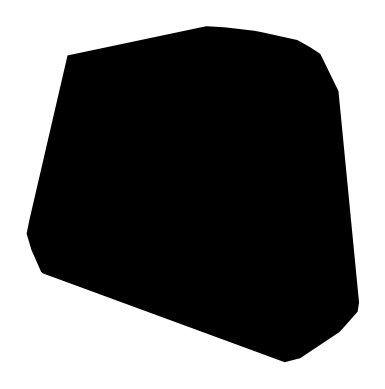

In [164]:
# 任意座標系_港区西麻布
rootpath = "/work/work/chiban/data/"
filename = rootpath + "13104-0111-19.geojson"
file = open(filename)
gdf = gpd.read_file(file)
gdf["all"] = 1
allgdf = gdf.dissolve(by="all", aggfunc="sum")
allgdf["convex_hull"] = allgdf.convex_hull
# matplotlibで可視化
fig , ax = plt.subplots(1, 1)
# 罫線を削除
ax.set_axis_off()
allgdf["convex_hull"].plot(ax=ax, aspect=1, color="black")
# matplotlib to .jpg
plt.savefig("/work/work/chiban/image_match/image/下落合_任意.jpg")

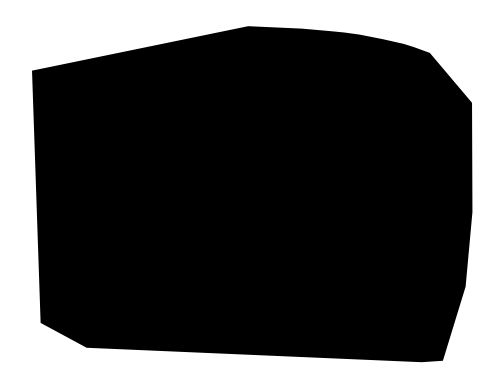

In [163]:
# shapefile
gdf = gpd.read_file("/work/work/chiban/data/sinjuku/r2ka13104.shp")
gdf = gdf[gdf["S_NAME"].isin(["下落合一丁目","下落合二丁目", "下落合三丁目", "下落合四丁目" ])]
gdf["all"] = 1
allgdf = gdf.dissolve(by="all", aggfunc="sum")
allgdf["convex_hull"] = allgdf.convex_hull
# ax = allgdf["convex_hull"].plot(alpha=.5)  # saving the first plot as an axis and setting alpha (transparency) to 0.5
# gdf.plot(ax=ax, color="white", linewidth=.5)  # passing the first plot and setting linewitdth to 0.5

# matplotlibで可視化
fig , ax = plt.subplots(1, 1)
# 罫線を削除
ax.set_axis_off()
allgdf["convex_hull"].plot(ax=ax, aspect=1, color="black")

# matplotlib to .jpg
plt.savefig("/work/work/chiban/image_match/image/下落合_絶対.jpg")

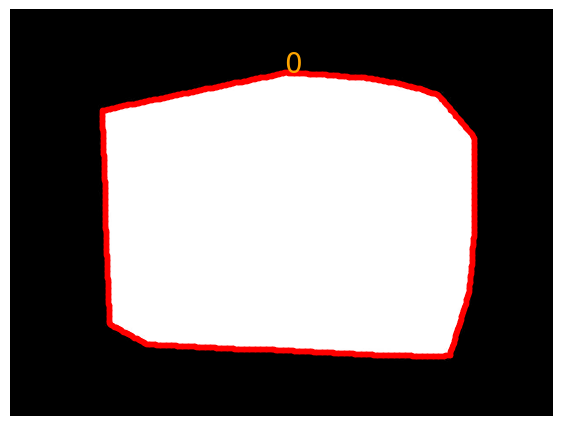

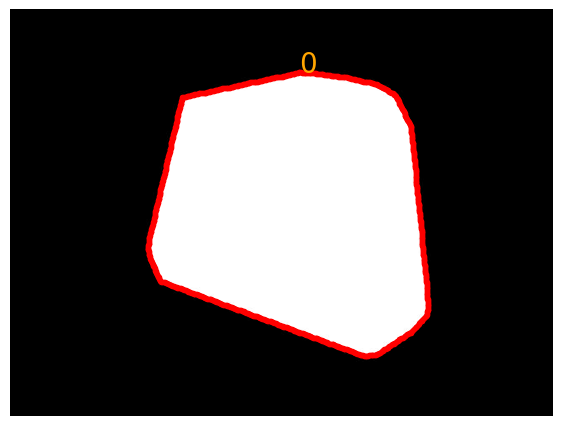

[[0.17874756]]


In [165]:
# 画像を読み込む。
img_z = cv2.imread("/work/work/chiban/image_match/image/下落合_絶対.jpg")
# 白黒反転
img_z = 255 - img_z
# グレースケールに変換する。
gray_z = cv2.cvtColor(img_z, cv2.COLOR_BGR2GRAY)
# # 2値化する。
binary_z = cv2.threshold(gray_z, 100, 255, cv2.THRESH_BINARY)[1]
# # # # 輪郭を抽出する。
contours_z, hierarchy_z = cv2.findContours(
    binary_z, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE
)
draw_contours(img_z, contours_z)

# 画像を読み込む。
img_n = cv2.imread("/work/work/chiban/image_match/image/下落合_任意.jpg")
# 白黒反転
img_n = 255 - img_n
# グレースケールに変換する。
gray_n = cv2.cvtColor(img_n, cv2.COLOR_BGR2GRAY)
# # 2値化する。
binary_n = cv2.threshold(gray_n, 100, 255, cv2.THRESH_BINARY)[1]
# # # # 輪郭を抽出する。
contours_n, hierarchy_n = cv2.findContours(
    binary_n, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE
)
draw_contours(img_n, contours_n)


num_cnts = len(contours_n)
# 類似度を計算する。
matches = np.empty((num_cnts, num_cnts))
for i, j in np.ndindex(*matches.shape):
    matches[i, j] = cv2.matchShapes(contours_z[i], contours_n[i], cv2.CONTOURS_MATCH_I1, 0)
print(matches)